# Classificação Linear

Nesse notebook vamos refrescar a sua memória sobre equações lineares ao mesmo tempo que te ajudaremos a enxergar uma reta como um classificador linear. 

**Nota**: Mesmo que você já saiba tudo sobre retas, não pule essa aula! Aqui já damos os primeiros passos para a criação de redes neurais.

## Equação da reta

A equação da reta é aprendida na forma $ax + by + c$, mas para nos adequarmos às nomenclaturas de redes neurais, podemos reescrever essa equação como $\mathbf{w_1x_1 + w_2x_2 + b}$. Ou seja, $\mathbf{w_1}$, $\mathbf{w_2}$ e $\mathbf{b}$ são os parâmetros que definem o nosso **modelo linear**, a nossa reta.

Vamos começar realizando o plot de uma reta específica:
$\mathbf{-1x_1 + 4x_2 + 0.4}$



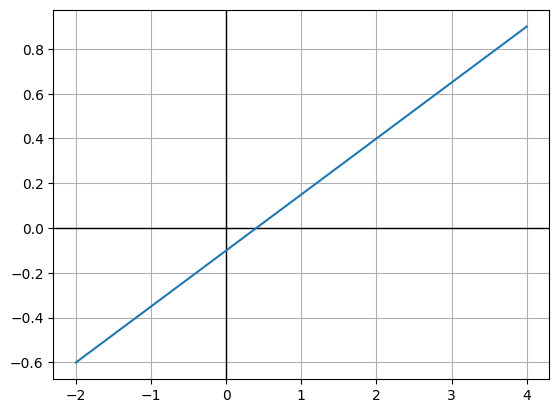

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x -c)/b
def plotline(a, b, c):
  x = np.linspace(-2, 4, 50)
  y = (-a*x -c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)
  
plotline(a, b, c)

### Solucionando a equação da reta para diferentes pontos

A seguir vamos selecionar três pontos no espaço, e soucionar a equação da reta para esses pontos. 

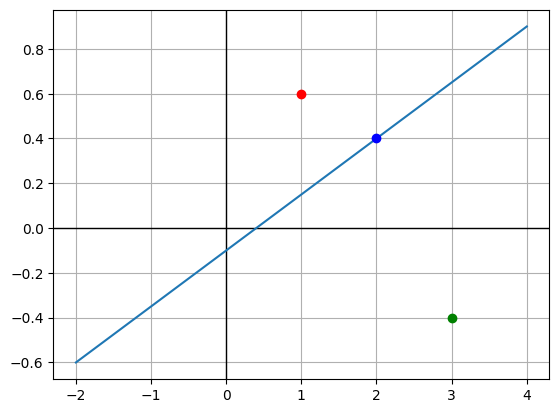

In [4]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')
plt.plot(p2[0], p2[1], color='r', marker='o')
plt.plot(p3[0], p3[1], color='g', marker='o')

In [6]:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)

0.00
1.80
-4.20


Note que o ponto <font color='blue'>$p_1$</font> está na reta, enquanto <font color='red'>$p_2$</font> está acima da reta e <font color='green'>$p_3$</font> abaixo. Ao solucionar a equação da reta para esses três pontos, tivemos respectivamente resultados <font color='blue'>nulo $(=0)$</font>, <font color='red'>positivo $(>0)$</font> e <font color='green'>negativo $(<0)$</font>.

Esse comportamento é consistente para quaisquer pontos na reta, acima ou abaixo dela. Ou seja, se chamarmos a equação da reta de $f(x)$, temos as seguintes regras:

* <font color='blue'>$f(x) = 0$</font> define pontos na reta
* <font color='red'>$f(x) > 0$</font> define pontos acima da reta
* <font color='green'>$f(x) < 0$</font> define pontos abaixo da reta


## Modelo Linear

Nossa reta pode ser interpretada como um modelo linear, que nada mais é do que uma **função de mapeamento** $X \rightarrow Y$, que mapeia cada ponto em $X$ para um ponto em $Y$. Em outras palavras, dados os parâmetros $W = \{w_1, w_2\}$ e $b$ de uma reta, é possível mapear uma entrada $X = \{x_1, x_2\}$ para a saída $f(x; W, b)$.

Para problemas de classificação, os valores de $y$ para novas entradas $x$ vão definir se $x$ é um ponto <font color='red'>acima</font> ou <font color='green'>abaixo</font> da reta, formando portanto um classificador capaz de **separar linearmente problemas com duas classes**.

<img src="https://drive.google.com/uc?export=view&id=18Emd5S0LxY_-6_oqOW_1oBztomJGuRfF" width="500">


### Regra Geral

Formalizando a nomenclatura de redes neurais, em duas dimensões $(x_1, x_2)$ nosso modelo linear tem dois **pesos** $(w_1, w_2)$ e um **viés** $b$, que em inglês são chamados de **w**eight e **b**ias. 

Em duas dimensões nosso modelo forma uma reta, como vimos anteriormente. Para um número de dimensões $d > 2$, modelos lineares são chamados de **hiperplanos**, e são compostos por:
* um peso $w_i$ para cada dimensão $x_i$. 
* um único viés $b$

Exemplo, para 3 dimensões $(x_1, x_2, x_3)$ teríamos três pesos $(w_1, w_2, w_3)$ e um único viés $b$. Sua função de mapeamento seria $y = w_1x_1 + w_2x_2 + w_3x_3 + b$
 
De forma geral, define-se que dada uma entrada com $d$ dimensões, a função de mapeamento de um modelo linear é $$y = \sum^{d}_{i=1}w_ix_i + b$$




In [13]:
y = w1*x1 + w2*x2 + b
y = w1*x1 + w2*x2 + w3*x3 + b

NameError: name 'w1' is not defined

## Exercício Sugerido

**Vamos treinar um classificador linear em duas dimensões usando a tecnologia mais avançada que existe: o seu cérebro!**

A célula a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função ```make_classification()``` do sklearn. <br>
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

1


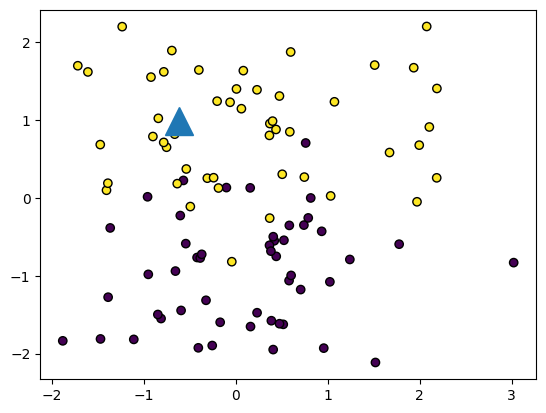

In [27]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

**Seu trabalho é** encontrar os melhores parâmetros $(W, b)$ de um modelo linear para classificar a distribuição gerada. 

O ideal é **não** fazer por tentativa e erro, mas prestar atenção no impacto de cada mudança realizada. Note que os pesos $W$ são componentes angulares do seu modelo, enquanto o viés $b$ é o componente linear que desloca a reta no espaço.


5.6


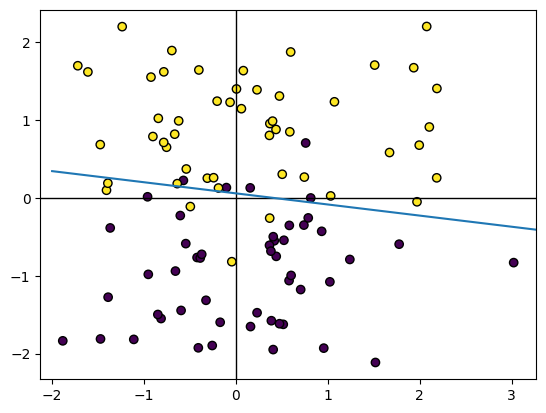

In [45]:
def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 1 #a
w2 = 7#b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora podemos utilizar o nosso modelo como um classificador linear com um simples **```if```** para avaliar a solução da equação da reta para novos pontos no espaço.

0 blue


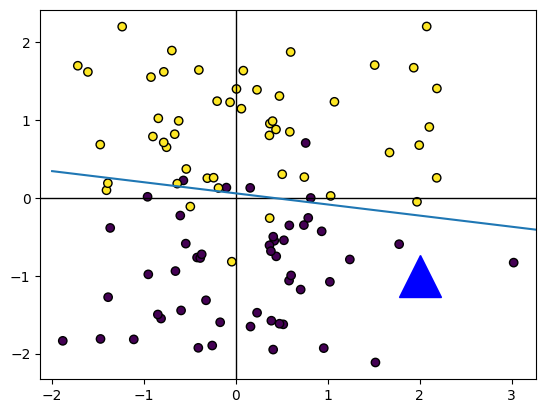

In [47]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'
  
p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

De posse da função ```classify()``` podemos agora classificar cada um dos pontos gerados aleatoriamente pelo ```make_classification```, calculando assim a acurácia do nosso modelo.

In [49]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1
    
    
print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 90.0
